In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import date



symbols  = [ 'SPY', "QQQ", "VGK", "SCZ", "EWJ", "EEM", #eq
           'REM', "VNQ", "RWX", # re
           'TIP', "IEF", "TLT", "BWX", #fi
           'DBC', "GLD", #como
           'twtr', 'intc', 'tsm',"VWUSX", "Amc"]

all_stocks = pd.DataFrame()
 
for symbol in symbols:
    tmp_close = yf.download(symbol, 
                      start='2022-01-01', 
                      end= date.today(),
                      interval = "1d",
                      threads = True,
                      progress=False)['Adj Close']
    all_stocks = pd.concat([all_stocks, tmp_close], axis=1)
 
all_stocks.columns=symbols
all_stocks

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2021-12-31 00:00:00,474.959991,397.850006,68.239998,73.089996,66.959999,48.849998,34.509998,116.010002,35.599998,128.751770,114.889671,147.983932,28.247410,20.780001,170.960007,43.220001,51.110657,120.309998,65.029999,27.200001
2022-01-03 00:00:00,477.709991,401.679993,68.889999,73.430000,67.029999,49.200001,35.189999,115.099998,35.639999,128.014343,113.820694,144.099350,27.907681,20.860001,168.330002,42.660000,52.807728,128.800003,65.510002,26.520000
2022-01-04 00:00:00,477.549988,396.470001,68.980003,73.650002,67.910004,49.029999,35.310001,114.959999,35.570000,127.526039,113.760757,143.500168,27.907681,21.110001,169.570007,40.849998,52.738258,133.399994,64.040001,25.490000
2022-01-05 00:00:00,468.380005,384.290009,68.360001,72.919998,67.599998,48.230000,34.680000,111.669998,34.980000,126.489647,113.281212,142.721252,27.787775,21.020000,169.059998,39.500000,53.462738,127.059998,61.439999,22.750000
2022-01-06 00:00:00,467.940002,384.019989,68.110001,72.360001,67.099998,48.450001,34.790001,111.769997,34.860001,125.941551,113.001480,143.090744,27.737816,21.200001,166.990005,39.590000,53.601677,128.470001,61.209999,22.459999
2022-01-07 00:00:00,466.089996,379.859985,68.449997,72.290001,66.669998,48.889999,34.970001,111.029999,34.790001,125.792076,112.631836,142.062164,27.807760,21.240000,167.750000,39.669998,53.035988,123.500000,60.480000,22.990000
2022-01-10 00:00:00,465.510010,380.109985,67.519997,71.349998,66.510002,48.889999,34.930000,110.389999,34.610001,125.951515,112.601868,142.411697,27.837738,21.150000,168.259995,39.970001,54.792606,125.010002,60.509998,22.780001
2022-01-11 00:00:00,469.750000,385.820007,68.360001,72.260002,67.029999,50.020000,35.290001,110.559998,34.689999,126.828461,112.871613,143.360367,27.887697,21.559999,170.289993,40.660000,55.487316,129.169998,61.590000,22.790001
2022-01-12 00:00:00,471.019989,387.350006,68.989998,73.099998,67.989998,50.849998,35.310001,110.690002,34.849998,126.011307,112.891586,142.811127,28.117512,21.730000,170.740005,40.250000,55.318604,132.229996,61.610001,22.719999
2022-01-13 00:00:00,464.529999,377.660004,68.480003,72.540001,67.309998,50.130001,35.139999,110.470001,34.689999,126.041206,113.251244,144.079361,28.197449,21.500000,170.160004,38.700001,54.524647,139.190002,59.349998,20.660000


In [3]:
returns = np.log(all_stocks/all_stocks.shift(1))
returns.fillna(0)
returns = returns.iloc[1: , :]
returns

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2022-01-03 00:00:00,0.005773,0.009581,0.009480,0.004641,0.001045,0.007139,0.019513,-0.007875,0.001123,-0.005744,-0.009348,-0.026601,-0.012100,0.003842,-0.015503,-0.013042,0.032665,0.068189,0.007354,-0.025318
2022-01-04 00:00:00,-0.000335,-0.013055,0.001306,0.002992,0.013043,-0.003461,0.003404,-0.001217,-0.001966,-0.003822,-0.000527,-0.004167,0.000000,0.011913,0.007340,-0.043355,-0.001316,0.035091,-0.022695,-0.039613
2022-01-05 00:00:00,-0.019389,-0.031203,-0.009029,-0.009961,-0.004575,-0.016451,-0.018003,-0.029036,-0.016726,-0.008160,-0.004224,-0.005443,-0.004306,-0.004273,-0.003012,-0.033606,0.013644,-0.048693,-0.041447,-0.113721
2022-01-06 00:00:00,-0.000940,-0.000703,-0.003664,-0.007709,-0.007424,0.004551,0.003167,0.000895,-0.003436,-0.004343,-0.002472,0.002586,-0.001800,0.008527,-0.012320,0.002276,0.002595,0.011036,-0.003751,-0.012829
2022-01-07 00:00:00,-0.003961,-0.010892,0.004979,-0.000968,-0.006429,0.009041,0.005161,-0.006643,-0.002010,-0.001188,-0.003277,-0.007214,0.002518,0.001885,0.004541,0.002019,-0.010610,-0.039454,-0.011998,0.023323
2022-01-10 00:00:00,-0.001245,0.000658,-0.013680,-0.013088,-0.002403,0.000000,-0.001145,-0.005781,-0.005187,0.001267,-0.000266,0.002457,0.001077,-0.004246,0.003036,0.007534,0.032585,0.012153,0.000496,-0.009176
2022-01-11 00:00:00,0.009067,0.014910,0.012364,0.012673,0.007788,0.022850,0.010254,0.001539,0.002309,0.006938,0.002393,0.006639,0.001793,0.019200,0.011992,0.017116,0.012599,0.032736,0.017691,0.000439
2022-01-12 00:00:00,0.002700,0.003958,0.009174,0.011558,0.014220,0.016457,0.000567,0.001175,0.004602,-0.006464,0.000177,-0.003839,0.008207,0.007854,0.002639,-0.010135,-0.003045,0.023413,0.000325,-0.003076
2022-01-13 00:00:00,-0.013874,-0.025334,-0.007420,-0.007690,-0.010052,-0.014260,-0.004826,-0.001990,-0.004602,0.000237,0.003181,0.008841,0.002839,-0.010641,-0.003403,-0.039270,-0.014456,0.051297,-0.037372,-0.095046
2022-01-14 00:00:00,0.000409,0.006203,-0.002778,-0.004698,-0.001189,-0.000399,-0.003421,-0.009093,0.000576,-0.004517,-0.006905,-0.015225,-0.004973,0.012939,-0.002884,-0.006741,0.013739,0.010506,0.001515,-0.004366


Prix des actions à l'instant t-1

In [4]:
vp = all_stocks[-1::].values[0]
vp

array([436.63000488, 346.79998779,  62.31999969,  66.61000061,
        62.93999863,  46.72999954,  31.78000069, 102.54000092,
        33.47000122, 127.18000031, 112.12000275, 139.86999512,
        27.20000076,  23.87000084, 178.38000488,  35.54999924,
        47.70000076, 107.01000214,  54.02999878,  18.86000061])

In [9]:
from scipy.optimize import minimize, Bounds

lamb = 0.01 #Faire attention car sinon il n'y a pas de mouvements de position
alpha = 200
Money = 0
Nb_max_d_actions_par_actif = 20
Pos = []
nb_actifs = returns.shape[1]
correl = returns.cov().copy()
correl_matrix = correl.to_numpy()

# p0 = nombre de chaque stocks qui correspond a un investissement equitable par stocks
p0 = np.array([Money/(nb_actifs*vp[i]) for i in range(nb_actifs)])

Pos.append(p0)

def objective_corr(pos):
    
    s = pos@correl_matrix@pos - alpha*returns.mean()@pos
    
    print('\033[92m'+"Coûts de transaction: "+str(TC(Pos,pos))+'\033[0m')
    print('\033[93m'+"Return : " + str(returns.mean()@pos) + '\033[0m')
    print('\033[94m'+"Somme des positions: "+str(vp@pos.T)+'\033[0m')
    print(f"Les valeurs  du vecteur poids sont:{pos.round(3)}")
    print(f"Les valeurs de la fonction objectif:{s.round(3)}")
    return s

def TC(Pos,pos):
    return lamb*(vp@np.abs(pos-Pos[-1]))

cons = ({"type":"ineq", "fun": lambda x: Money - vp@np.array(x).T }, 
        # The positions must invest no more than the initial money.
        # This constraints says that the inequalities (ineq) must be non-negative.
        {"type": "ineq", "fun": lambda x: -(TC(Pos,x) + vp@(x-Pos[-1]).T)},
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        #{"type": "ineq", "fun": lambda x: -np.sum(returns.mean()*x)+1})
       )
 
 
#Every stock can get any position from - Nb_max_d_actions_par_actif to Nb_max_d_actions_par_actif
bounds = Bounds(-Nb_max_d_actions_par_actif, Nb_max_d_actions_par_actif)
 
p = minimize(objective_corr, p0, 
             method = "SLSQP", 
             bounds= bounds,
             constraints= cons, options={'maxiter': 300, 'ftol': 1e-09})


Pos.append(p.x)
p

Coûts de transaction: 0.0
Return : 0.0
Somme des positions: 0.0
Les valeurs  du vecteur poids sont:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Les valeurs de la fonction objectif:0.0
Coûts de transaction: 6.506294084829279e-08
Return : -3.214998361882411e-11
Somme des positions: 6.506294084829278e-06
Les valeurs  du vecteur poids sont:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Les valeurs de la fonction objectif:0.0
Coûts de transaction: 5.167722520127427e-08
Return : -5.2469989985020375e-11
Somme des positions: 5.167722520127427e-06
Les valeurs  du vecteur poids sont:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Les valeurs de la fonction objectif:0.0
Coûts de transaction: 9.286403610531125e-09
Return : -3.467327326275593e-11
Somme des positions: 9.286403610531124e-07
Les valeurs  du vecteur poids sont:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Les valeurs de la fonction objectif:0.0
Coûts de transaction: 9.925663

Somme des positions: -4932.467352874124
Les valeurs  du vecteur poids sont:[ -2.567  -4.192  -2.778  -2.84   -1.892  -1.348  -2.517  -3.781  -1.886
  -0.377  -0.751  -1.737  -1.161   4.264   1.307  -5.957  -2.098  -3.578
  -5.657 -11.154]
Les valeurs de la fonction objectif:-49.542
Coûts de transaction: 56.02137714199221
Return : 0.25504512768069815
Somme des positions: -4932.467354212697
Les valeurs  du vecteur poids sont:[ -2.567  -4.192  -2.778  -2.84   -1.892  -1.348  -2.517  -3.781  -1.886
  -0.377  -0.751  -1.737  -1.161   4.264   1.307  -5.957  -2.098  -3.578
  -5.657 -11.154]
Les valeurs de la fonction objectif:-49.542
Coûts de transaction: 56.02137718438303
Return : 0.25504512769849486
Somme des positions: -4932.467358451779
Les valeurs  du vecteur poids sont:[ -2.567  -4.192  -2.778  -2.84   -1.892  -1.348  -2.517  -3.781  -1.886
  -0.377  -0.751  -1.737  -1.161   4.264   1.307  -5.957  -2.098  -3.578
  -5.657 -11.154]
Les valeurs de la fonction objectif:-49.542
Coûts de tran

Coûts de transaction: 116.6195861616429
Return : 0.5023862857241589
Somme des positions: -10251.412418827
Les valeurs  du vecteur poids sont:[ -5.364  -8.76   -5.825  -5.947  -3.959  -2.802  -5.262  -7.933  -3.95
  -0.791  -1.581  -3.666  -2.443   8.982   2.752 -12.436  -4.363  -7.485
 -11.826 -20.   ]
Les valeurs de la fonction objectif:-94.96
Coûts de transaction: 116.61958615280503
Return : 0.5023862857057855
Somme des positions: -10251.412417943211
Les valeurs  du vecteur poids sont:[ -5.364  -8.76   -5.825  -5.947  -3.959  -2.802  -5.262  -7.933  -3.95
  -0.791  -1.581  -3.666  -2.443   8.982   2.752 -12.436  -4.363  -7.485
 -11.826 -20.   ]
Les valeurs de la fonction objectif:-94.96
Coûts de transaction: 116.61958616069965
Return : 0.5023862856797429
Somme des positions: -10251.412418732674
Les valeurs  du vecteur poids sont:[ -5.364  -8.76   -5.825  -5.947  -3.959  -2.802  -5.262  -7.933  -3.95
  -0.791  -1.581  -3.666  -2.443   8.982   2.752 -12.436  -4.363  -7.485
 -11.826 -20

Return : 0.7387989067007024
Somme des positions: -18041.770679251298
Les valeurs  du vecteur poids sont:[ -9.657 -15.788 -10.585 -10.779  -7.154  -4.981  -9.497 -14.442  -7.152
  -1.445  -2.91   -6.778  -4.483  16.523   5.059 -20.     -7.762 -13.504
 -20.    -20.   ]
Les valeurs de la fonction objectif:-136.957
Coûts de transaction: 206.35346211628502
Return : 0.7387989067242872
Somme des positions: -18041.770680280522
Les valeurs  du vecteur poids sont:[ -9.657 -15.788 -10.585 -10.779  -7.154  -4.981  -9.497 -14.442  -7.152
  -1.445  -2.91   -6.778  -4.483  16.523   5.059 -20.     -7.762 -13.504
 -20.    -20.   ]
Les valeurs de la fonction objectif:-136.957
Coûts de transaction: 206.35346210232115
Return : 0.7387989067431668
Somme des positions: -18041.77067888413
Les valeurs  du vecteur poids sont:[ -9.657 -15.788 -10.585 -10.779  -7.154  -4.981  -9.497 -14.442  -7.152
  -1.445  -2.91   -6.778  -4.483  16.523   5.059 -20.     -7.762 -13.504
 -20.    -20.   ]
Les valeurs de la fonctio

Return : 0.8532487940550608
Somme des positions: -23297.613404178905
Les valeurs  du vecteur poids sont:[-13.072 -20.    -14.455 -14.69   -9.716  -6.658 -12.891 -19.769  -9.737
  -1.99   -4.03   -9.422  -6.185  20.      6.986 -20.    -10.391 -18.292
 -20.    -20.   ]
Les valeurs de la fonction objectif:-156.837
Coûts de transaction: 267.4484271556993
Return : 0.8532487940393911
Somme des positions: -23297.613403124495
Les valeurs  du vecteur poids sont:[-13.072 -20.    -14.455 -14.69   -9.716  -6.658 -12.891 -19.769  -9.737
  -1.99   -4.03   -9.422  -6.185  20.      6.986 -20.    -10.391 -18.292
 -20.    -20.   ]
Les valeurs de la fonction objectif:-156.837
Coûts de transaction: 267.44842716599146
Return : 0.8532487940629759
Somme des positions: -23297.61340415372
Les valeurs  du vecteur poids sont:[-13.072 -20.    -14.455 -14.69   -9.716  -6.658 -12.891 -19.769  -9.737
  -1.99   -4.03   -9.422  -6.185  20.      6.986 -20.    -10.391 -18.292
 -20.    -20.   ]
Les valeurs de la fonction

Coûts de transaction: 300.7598227516265
Return : 0.9088386635199366
Somme des positions: -25998.360688347388
Les valeurs  du vecteur poids sont:[-16.069 -20.    -17.912 -18.17  -11.974  -8.078 -15.888 -20.    -12.033
  -2.49   -5.065 -11.883  -7.742  20.      8.753 -20.    -12.634 -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-166.16
Coûts de transaction: 300.75982275385417
Return : 0.9088386635054007
Somme des positions: -25998.36068857016
Les valeurs  du vecteur poids sont:[-16.069 -20.    -17.912 -18.17  -11.974  -8.078 -15.888 -20.    -12.033
  -2.49   -5.065 -11.883  -7.742  20.      8.753 -20.    -12.634 -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-166.16
Coûts de transaction: 300.75982274331017
Return : 0.908838663489731
Somme des positions: -25998.360687515757
Les valeurs  du vecteur poids sont:[-16.069 -20.    -17.912 -18.17  -11.974  -8.078 -15.888 -20.    -12.033
  -2.49   -5.065 -11.883  -7.742  20.      8.753 -20.    -12.634 -20.
 -20.    -20.  

Coûts de transaction: 339.7331117977564
Return : 0.9640602364288785
Somme des positions: -29000.282204583003
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -15.122 -10.019 -20.    -20.    -15.242
  -3.2    -6.539 -15.399  -9.948  20.     11.263 -20.    -15.713 -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-175.325
Coûts de transaction: 339.73311178379254
Return : 0.9640602364477584
Somme des positions: -29000.282203186616
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -15.122 -10.019 -20.    -20.    -15.242
  -3.2    -6.539 -15.399  -9.948  20.     11.263 -20.    -15.713 -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-175.325
Coûts de transaction: 339.73311178603666
Return : 0.9640602364431277
Somme des positions: -29000.28220341103
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -15.122 -10.019 -20.    -20.    -15.242
  -3.2    -6.539 -15.399  -9.948  20.     11.263 -20.    -15.713 -20.
 -20.    -20

Coûts de transaction: 363.2689551227551
Return : 1.001453272813891
Somme des positions: -30165.14130931962
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -19.195 -12.465 -20.    -20.    -19.415
  -4.142  -8.502 -20.    -12.868  20.     14.595 -20.    -19.614 -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-181.615
Coûts de transaction: 363.26895505769215
Return : 1.001453272781741
Somme des positions: -30165.14130281333
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -19.195 -12.465 -20.    -20.    -19.415
  -4.142  -8.502 -20.    -12.868  20.     14.595 -20.    -19.614 -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-181.615
Coûts de transaction: 363.2689550710778
Return : 1.001453272761421
Somme des positions: -30165.141304151897
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -19.195 -12.465 -20.    -20.    -19.415
  -4.142  -8.502 -20.    -12.868  20.     14.595 -20.    -19.614 -20.
 -20.    -20.   ]

Coûts de transaction: 366.23497276203847
Return : 1.006266784019414
Somme des positions: -30238.62430242706
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -19.95  -12.912 -20.    -20.    -20.
  -4.319  -8.87  -20.    -13.414  20.     15.221 -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-182.396
Coûts de transaction: 366.23497275320057
Return : 1.0062667840010404
Somme des positions: -30238.624301543274
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -19.95  -12.912 -20.    -20.    -20.
  -4.319  -8.87  -20.    -13.414  20.     15.221 -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-182.396
Coûts de transaction: 366.2349727610952
Return : 1.006266783974998
Somme des positions: -30238.624302332733
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -19.95  -12.912 -20.    -20.    -20.
  -4.319  -8.87  -20.    -13.414  20.     15.221 -20.    -20.    -20.
 -20.    -20.   ]
Les v

Return : 1.0138753706853845
Somme des positions: -30193.718703951185
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -14.555 -20.    -20.    -20.
  -4.985 -10.265 -20.    -15.477  20.     17.587 -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-183.737
Coûts de transaction: 374.22958629387983
Return : 1.0138753706731625
Somme des positions: -30193.718703537677
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -14.555 -20.    -20.    -20.
  -4.985 -10.265 -20.    -15.477  20.     17.587 -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-183.737
Coûts de transaction: 374.229586310669
Return : 1.0138753706802714
Somme des positions: -30193.71870521659
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -14.555 -20.    -20.    -20.
  -4.985 -10.265 -20.    -15.477  20.     17.587 -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-183.737


Coûts de transaction: 384.1991467860269
Return : 1.0239948001295724
Somme des positions: -30329.914449721276
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -17.036 -20.    -20.    -20.
  -5.996 -12.38  -20.    -18.602  20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-185.497
Coûts de transaction: 384.1991467853876
Return : 1.0239948001287744
Somme des positions: -30329.91444965735
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -17.036 -20.    -20.    -20.
  -5.996 -12.38  -20.    -18.602  20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-185.497
Coûts de transaction: 384.1991467859346
Return : 1.0239948001405896
Somme des positions: -30329.914449712036
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -17.036 -20.    -20.    -20.
  -5.996 -12.38  -20.    -18.602  20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les v

Coûts de transaction: 387.79906398428454
Return : 1.0283204625867932
Somme des positions: -30689.90616954661
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -18.68  -20.    -20.    -20.
  -6.673 -13.799 -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-186.203
Coûts de transaction: 387.79906400107365
Return : 1.028320462593902
Somme des positions: -30689.906171225528
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -18.68  -20.    -20.    -20.
  -6.673 -13.799 -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-186.203
Coûts de transaction: 387.7990640015698
Return : 1.0283204625553704
Somme des positions: -30689.90617198653
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -18.68  -20.    -20.    -20.
  -6.673 -13.799 -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les v

Return : 1.0309563697138142
Somme des positions: -31004.075714191666
Les valeurs  du vecteur poids sont:[-20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.    -7.37
 -15.26 -20.   -20.    20.    20.   -20.   -20.   -20.   -20.   -20.  ]
Les valeurs de la fonction objectif:-186.612
Coûts de transaction: 390.94075943862964
Return : 1.0309563696877717
Somme des positions: -31004.07571498113
Les valeurs  du vecteur poids sont:[-20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.    -7.37
 -15.26 -20.   -20.    20.    20.   -20.   -20.   -20.   -20.   -20.  ]
Les valeurs de la fonction objectif:-186.612
Coûts de transaction: 390.9407594438703
Return : 1.0309563696186668
Somme des positions: -31004.0757155052
Les valeurs  du vecteur poids sont:[-20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.   -20.    -7.37
 -15.26 -20.   -20.    20.    20.   -20.   -20.   -20.   -20.   -20.  ]
Les valeurs de la fonction objectif:-186.612
Coûts de transaction: 393.087694240116
Return 

Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.
  -9.662 -20.    -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-187.337
Coûts de transaction: 399.1698463421469
Return : 1.0346440768709355
Somme des positions: -31826.98440533286
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.
  -9.662 -20.    -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-187.337
Coûts de transaction: 399.1698463500416
Return : 1.034644076844893
Somme des positions: -31826.984406122323
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.
  -9.662 -20.    -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-187.337
Coûts de transaction: 399.16984635528235
Return : 1.034644076775788
So

Return : 1.0347816528011942
Somme des positions: -31882.539718883156
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.
 -10.099 -20.    -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-187.362
Coûts de transaction: 399.72539947351487
Return : 1.0347816527889724
Somme des positions: -31882.53971846965
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.
 -10.099 -20.    -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-187.362
Coûts de transaction: 399.72539949030397
Return : 1.0347816527960811
Somme des positions: -31882.539720148565
Les valeurs  du vecteur poids sont:[-20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.    -20.
 -10.099 -20.    -20.    -20.     20.     20.    -20.    -20.    -20.
 -20.    -20.   ]
Les valeurs de la fonction objectif:-187.36

Return : 1.037900055259464
Somme des positions: -33141.799772639126
Les valeurs  du vecteur poids sont:[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.  20.
  20. -20. -20. -20. -20. -20.]
Les valeurs de la fonction objectif:-187.943
Coûts de transaction: 412.3180000254934
Return : 1.0379000552830489
Somme des positions: -33141.79977366835
Les valeurs  du vecteur poids sont:[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.  20.
  20. -20. -20. -20. -20. -20.]
Les valeurs de la fonction objectif:-187.943
Coûts de transaction: 412.31800001152953
Return : 1.0379000553019286
Somme des positions: -33141.79977227196
Les valeurs  du vecteur poids sont:[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.  20.
  20. -20. -20. -20. -20. -20.]
Les valeurs de la fonction objectif:-187.943
Coûts de transaction: 412.31800001377366
Return : 1.037900055297298
Somme des positions: -33141.79977249637
Les valeurs  du vecteur poids sont:[-20. -20. -20. -20. -2

     fun: -187.94280979565198
     jac: array([ 0.32708168,  0.5473938 ,  0.39036751,  0.39006042,  0.24687386,
        0.14115524,  0.33126831,  0.55041122,  0.25464439,  0.05836105,
        0.12360001,  0.29818916,  0.18273354, -0.69838524, -0.21219826,
        0.77715492,  0.22977257,  0.45094681,  0.75269508,  1.45198059])
 message: 'Optimization terminated successfully'
    nfev: 609
     nit: 29
    njev: 29
  status: 0
 success: True
       x: array([-20., -20., -20., -20., -20., -20., -20., -20., -20., -20., -20.,
       -20., -20.,  20.,  20., -20., -20., -20., -20., -20.])

In [10]:
Pos[-1].round(3)

array([-20., -20., -20., -20., -20., -20., -20., -20., -20., -20., -20.,
       -20., -20.,  20.,  20., -20., -20., -20., -20., -20.])

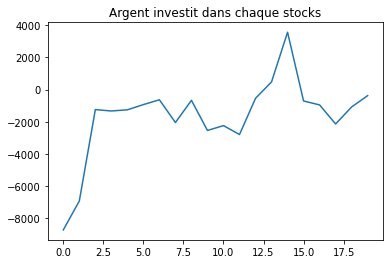

L'argent est le plus investit dans l'action: GLD


In [11]:
plt.plot([p.x[i] * all_stocks[-1::].values[0][i] for i in range(len(p.x))])
plt.title("Argent investit dans chaque stocks")
plt.show()
print("L'argent est le plus investit dans l'action: "+symbols[np.argmax([p.x[i] * all_stocks[-1::].values[0][i] for i in range(len(p.x))])])

In [15]:
# On a bien investi au total: Money=1000
np.dot(vp,p.x.T)

-33141.79977416709

In [13]:
# Le returns avec une telle repartition de portefeuille est de:
np.sum(returns.mean()*p.x)

1.0379000553066215

In [14]:
print("Nombre d'action acheté pour chaque symbols: ")
r = pd.DataFrame([symbols,p.x])
for i in range(len(symbols)):
    print(symbols[i],p.x[i].round(3))

Nombre d'action acheté pour chaque symbols: 
SPY -20.0
QQQ -20.0
VGK -20.0
SCZ -20.0
EWJ -20.0
EEM -20.0
REM -20.0
VNQ -20.0
RWX -20.0
TIP -20.0
IEF -20.0
TLT -20.0
BWX -20.0
DBC 20.0
GLD 20.0
twtr -20.0
intc -20.0
tsm -20.0
VWUSX -20.0
Amc -20.0
